In [9]:
import icarogw
import os
import bilby
import corner
import pickle
import h5py
import matplotlib.pyplot as plt
import numpy as np
from icarogw.posterior_samples import posterior_samples
from icarogw.analyses.cosmo_pop_rate_marginalized import hierarchical_analysis2
from icarogw.utils.quick_init import initialize_prior_dict2
from icarogw.injections import injections_at_detector2
import psutil

npool = psutil.cpu_count() - 1

injections0 = pickle.load(open(
    "/home/czc/projects/working/LIGO_posterior/O1_O2_O3_det_frame_SNR9.inj", "rb"))

injections = injections_at_detector2(injections0)


In [10]:
posterior_dict = pickle.load(open("events.pkl", "rb"))
    
print(f"Using {len(posterior_dict)} events.")

Using 69 events.


In [11]:
population_model = "PBH-bpower-2nd"
cosmology_model = 'flatLCDM'
outdir = f'./results/H0_GWTC-3_{population_model}_{cosmology_model}_final/'
injections.update_cut(snr_cut=9, ifar_cut=0) # We are going to update the injections with the new SNR cut to 12

Selecting injections with SNR 9.000000 and IFAR 0.000000 yr


In [12]:
# Setup the priors here. We are going to sample on just H0 and the maximum BH mass for a powerlaw model, just to speed up the code and fixing all the parameters
from bilby.core.prior import Uniform
prior_dict = initialize_prior_dict2(population_model, cosmology_model)

prior_dict['H0'] = 67.4
prior_dict['Om0'] = 0.315

prior_dict['ms'] = Uniform(5.0, 50.0, name='$m_*$')
prior_dict['α1'] = Uniform(0, 3.0, name='$\\alpha_1$')
prior_dict['α2'] = Uniform(1.0, 10.0, name='$\\alpha_2$')
# prior_dict['log_fpbh'] = Uniform(-3.0, 0.0, name='$\\log_{10}fpbh$')

prior_dict

{'ms': Uniform(minimum=5.0, maximum=50.0, name='$m_*$', latex_label='$m_*$', unit=None, boundary=None),
 'α1': Uniform(minimum=0, maximum=3.0, name='$\\alpha_1$', latex_label='$\\alpha_1$', unit=None, boundary=None),
 'α2': Uniform(minimum=1.0, maximum=10.0, name='$\\alpha_2$', latex_label='$\\alpha_2$', unit=None, boundary=None),
 'log_fpbh': Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}\\mathrm{fpbh}$', latex_label='$\\log_{10}\\mathrm{fpbh}$', unit=None, boundary=None),
 'H0': 67.4,
 'Om0': 0.315}

22:42 bilby INFO    : Running for label 'dynesty', output will be saved to './results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final/'
22:42 bilby INFO    : Search parameters:
22:42 bilby INFO    :   ms = Uniform(minimum=5.0, maximum=50.0, name='$m_*$', latex_label='$m_*$', unit=None, boundary=None)
22:42 bilby INFO    :   α1 = Uniform(minimum=0, maximum=3.0, name='$\\alpha_1$', latex_label='$\\alpha_1$', unit=None, boundary=None)
22:42 bilby INFO    :   α2 = Uniform(minimum=1.0, maximum=10.0, name='$\\alpha_2$', latex_label='$\\alpha_2$', unit=None, boundary=None)
22:42 bilby INFO    :   log_fpbh = Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}\\mathrm{fpbh}$', latex_label='$\\log_{10}\\mathrm{fpbh}$', unit=None, boundary=None)
22:42 bilby INFO    :   H0 = 67.4
22:42 bilby INFO    :   Om0 = 0.315


Using the parallel mode with 2000 samples


22:44 bilby INFO    : Single likelihood evaluation took 1.120e+00 s


0it [00:00, ?it/s]

22:44 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 20, 'npdim': None, 'rstate': None, 'queue_size': 31, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f8c29894b20>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 2}
22:44 bilby INFO    : Checkpoint every check_point_delta_t = 60s
22:44 bilby INFO    : Using dynesty version 1.0.1
22:44 bilby INFO    : Using the bilby-implemented rwalk sampl

6417it [00:03, 1779.32it/s, bound:591 nc:  1 ncall:2.1e+05 eff:3.1% logz=-1769.21+/-0.18 dlogz:0.100>0.1]

22:44 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final//dynesty_resume.pickle
22:44 bilby INFO    : Writing 1746 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])
22:44 bilby INFO    : Starting to close worker pool.
22:44 bilby INFO    : Finished closing worker pool.


6417it [00:06, 1007.75it/s, bound:591 nc:  1 ncall:2.1e+05 eff:3.3% logz=-1769.14+/-0.19 dlogz:0.000>0.1]

22:44 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
22:44 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
22:44 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
22:44 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
22:44 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
22:44 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.


22:44 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
22:44 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
22:44 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
22:44 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
22:44 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
22:44 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
22:44 bilby INFO    : Sampling time: 3:28:23.680661
22:44 bilby INFO    : Summary of results:
nsamples: 6917
ln_noise_evidence:    nan
ln_evidence: -1769.136 +/-  0.189
ln_bayes_factor:    nan +/-  0.189



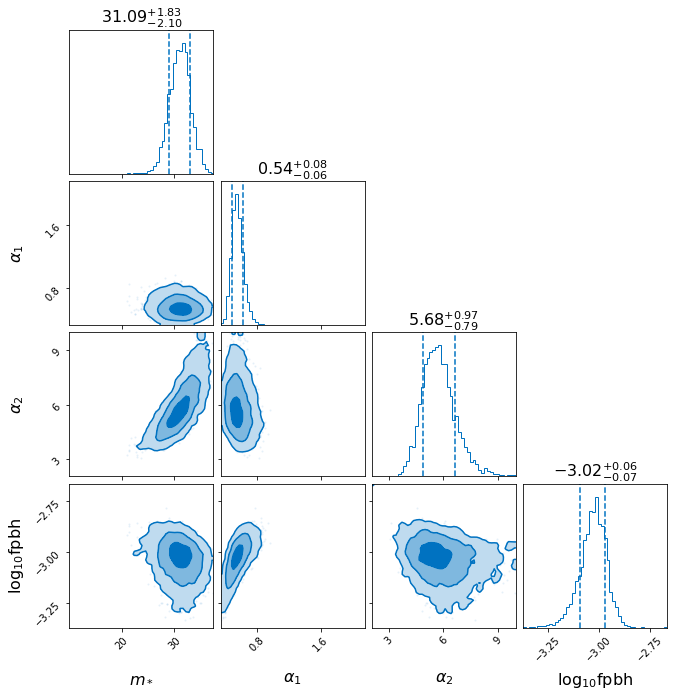

In [13]:
analysis = hierarchical_analysis2(posterior_dict, injections, fixed_cosmo=True)

# Run bilby.  Here we will be using emcee
result = analysis.run_bilby(population_model, cosmology_model, prior_dict, nlive=500, nact=2, walks=20,
                            outdir=outdir, label='dynesty', npool=npool, parallel=2000, check_point_delta_t=60)
result.plot_corner()


In [14]:
import numpy as np
np.exp(-1059.681-(-1059.303))

0.685230500665919

In [15]:
import numpy as np
np.exp(-1059.681-(-1060.368))

1.987743349398055

In [16]:
import matplotlib.lines as mlines

outdir1 = "./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final/"
outdir2 = "./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final/"

posteriors1 = np.loadtxt(f"{outdir1}/dynesty_samples.dat", skiprows=1)
posteriors2 = np.loadtxt(f"{outdir2}/dynesty_samples.dat", skiprows=1)

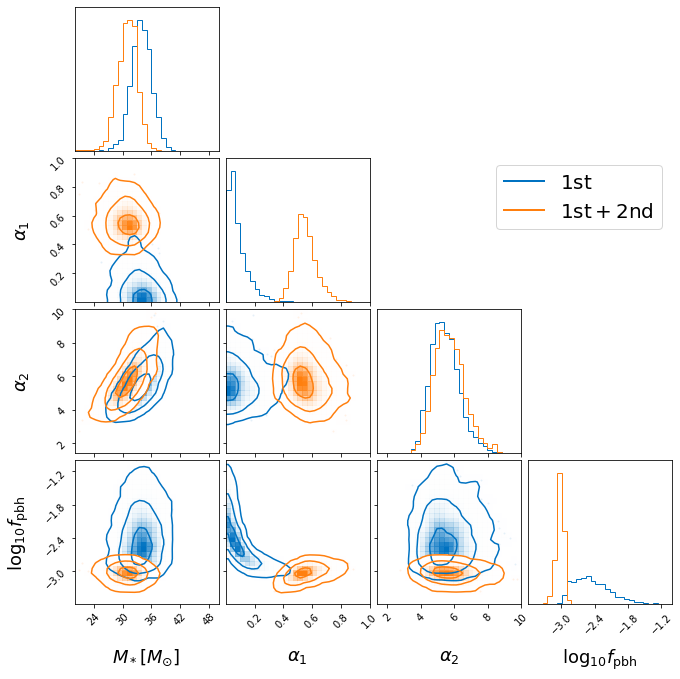

In [28]:
range=((20, 50), (0, 1), (1.4, 10), (-3.6, -1))

fig = corner.corner(
    posteriors1,
    bins=30,
    smooth=0.9,
    color="#0072C1",
    labels=[
        r"$M_*[M_{\odot}]$",
        r"$\alpha_1$",
        r"$\alpha_2$",
        r"$\log_{10}f_\mathrm{pbh}$",
    ],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=False,
    show_titles=False,
    title_kwargs={"fontsize": 18},
    label_kwargs=dict(fontsize=18),
    range=range,
)

corner.corner(
    posteriors2,
    bins=30,
    smooth=0.9,
    color="#FF7F0E",
    labels=[
        r"$M_*[M_{\odot}]$",
        r"$\alpha_1$",
        r"$\alpha_2$",
        r"$\log_{10}f_\mathrm{pbh}$",
    ],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=False,
    show_titles=False,
    title_kwargs={"fontsize": 18},
    label_kwargs=dict(fontsize=18),
    range=range,
    fig=fig,
    weights=np.ones(len(posteriors2)) * len(posteriors1) / len(posteriors2),
)

blue_line = mlines.Line2D([], [], color="#0072C1", lw=2, label=r"$\rm{1st}$")
orange_line = mlines.Line2D([], [], color="#FF7F0E", lw=2, label=r"$\rm{1st+2nd}$")
plt.legend(
    handles=[blue_line, orange_line],
    bbox_to_anchor=(1, 3.12),
    loc="upper right",
    fontsize=20,
)  # prop={'size': 8})
plt.savefig("../latex/post-bpower.pdf")
plt.show()


In [ ]:
def get_credibles(posts):
    x_low, x_median, x_up = np.quantile(posts, [0.05, 0.5, 0.95])
    return x_median, (x_up - x_median), (x_median - x_low)

In [ ]:
posts = posteriors2[:, 0]
get_credibles(posts)

(8.577761574382968, 2.1495897417844088, 1.2869388530857746)

In [ ]:
posts = posteriors2[:, 1]
get_credibles(posts)

(5.580436222522744, 7.123537126525244, 3.815197259824316)

In [ ]:
posts = posteriors2[:, 2]
get_credibles(posts)

(2.0493970562483588, 0.21835913085030167, 0.20964424697635398)

In [ ]:
posts = posteriors2[:, 3]
get_credibles(posts)

(-2.658461218847613, 0.06414722313133892, 0.07805943662681525)